## Membuat Model Linear Regression dari CPU Performance

In [98]:
import pandas as pd

df = pd.read_excel('cpu.xls')

df

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PERFORMANCE
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...
194,50,2000,32000,24,6,26,114
195,50,2000,32000,48,26,52,208
196,50,2000,32000,112,52,104,307
197,50,4000,32000,112,52,104,397


In [99]:
X = df[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
y = df['PERFORMANCE']

In [100]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
linreg.coef_

array([0.03844954, 0.01673911, 0.00445113, 0.60253405, 1.29143841,
       0.90602907])

In [102]:
linreg.intercept_

-43.97485819802405

In [103]:
linreg.predict([[30,8000,64000,96,12,176]])

array([608.7655603])

### Menghitung Rumus Linear Regression

Data ke 199

Rumus Linear Regression

`y = coef1*x1 + coef2*x2 + coefn*xn + b`

In [104]:
0.03844954*30 + 0.01673911*8000 + 0.00445113*64000 + 0.60253405*96 + 1.29143841*12 + 0.90602907*176 -43.97485819802405

608.765474041976

### Visualisasi Model Linear Regression

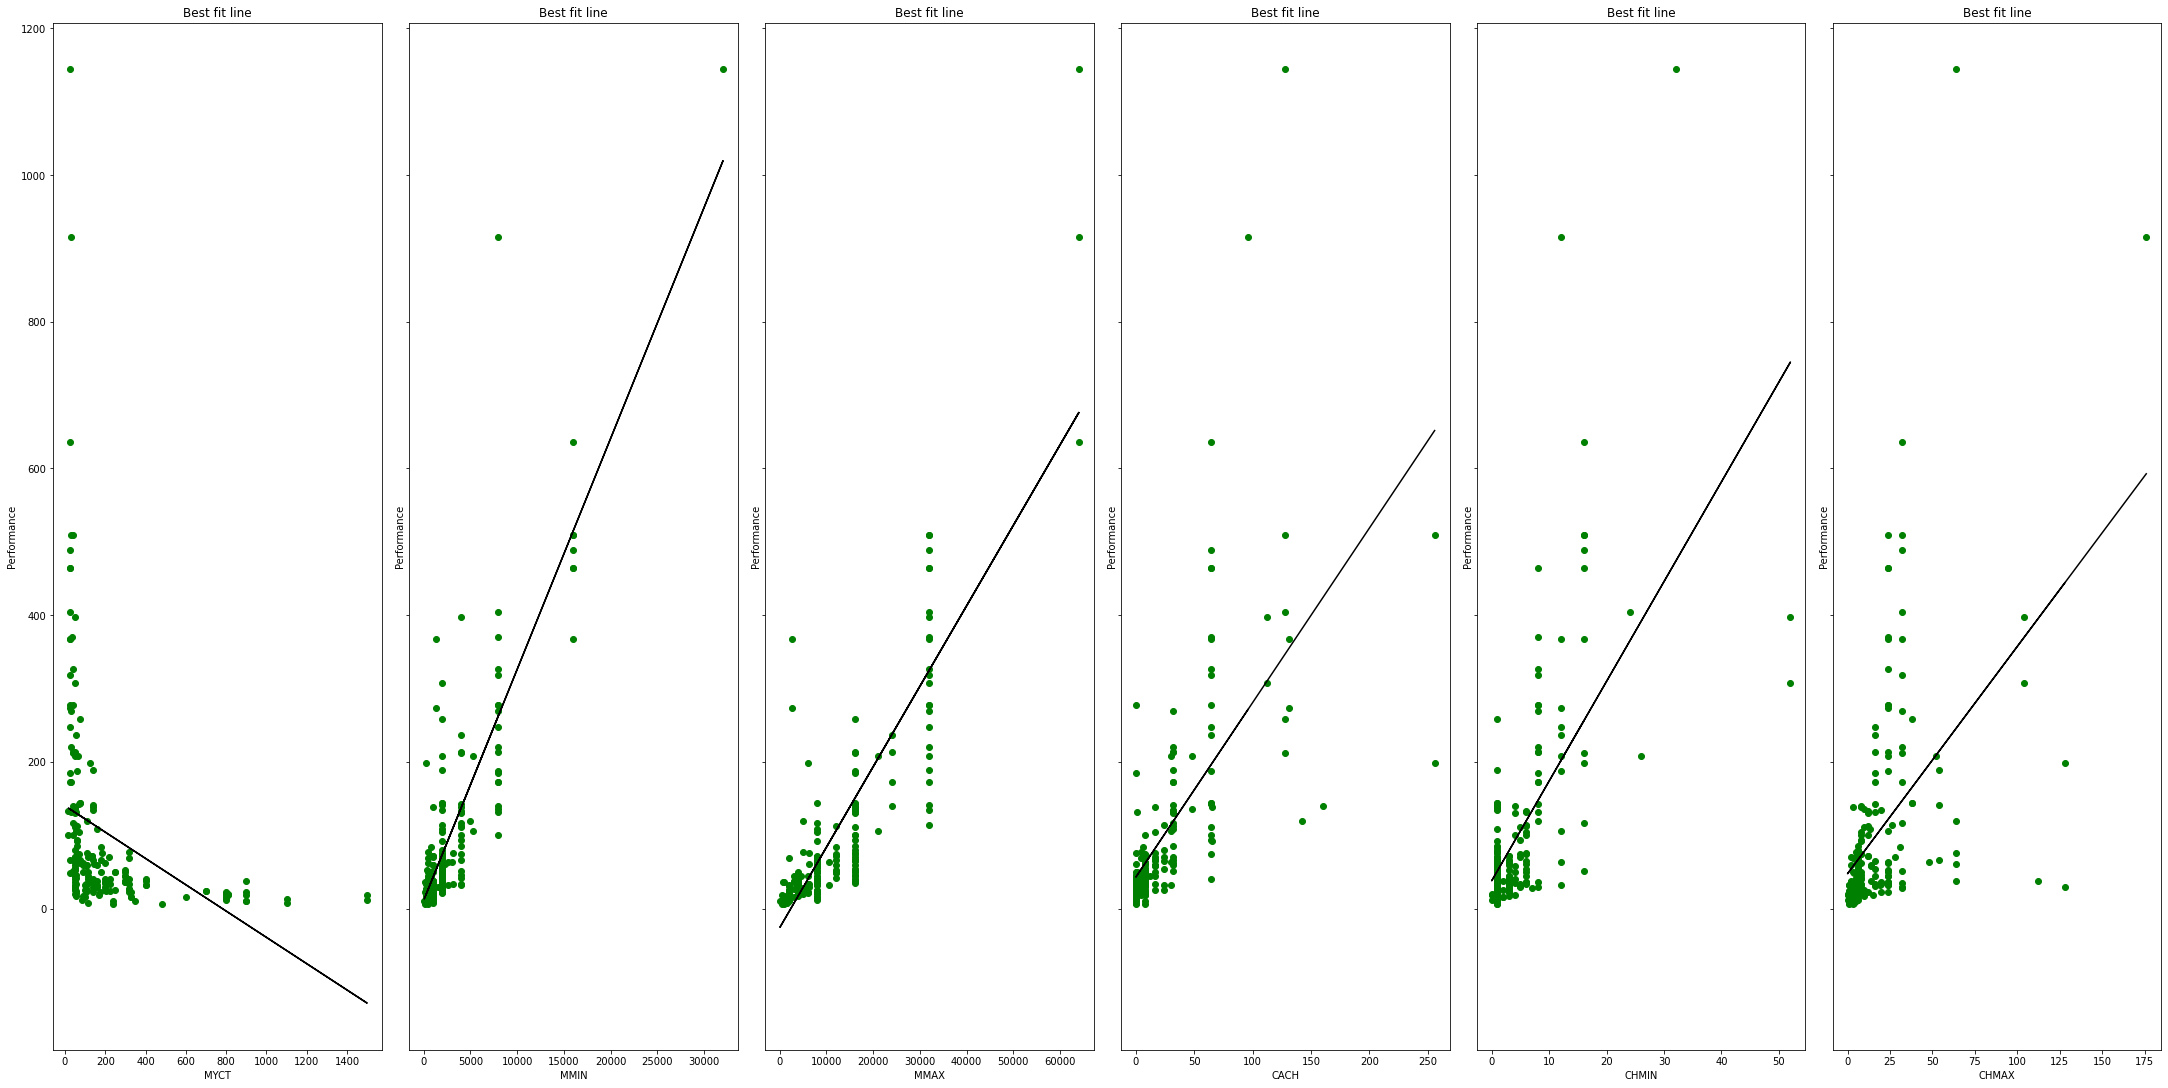

In [105]:
import numpy as np
from sklearn.linear_model import LinearRegression
X_copy = X
X_copy =pd.get_dummies(X_copy)
X_copy=X_copy.fillna(0)
linear_regr_test = LinearRegression()

fig, axes = plt.subplots(1,len(X_copy.columns.values),sharey=True,constrained_layout=True,figsize=(30,15))

for i,e in enumerate(X_copy.columns):
  linear_regr_test.fit(X_copy[e].values[:,np.newaxis], y.values)
  axes[i].set_title("Best fit line")
  axes[i].set_xlabel(str(e))
  axes[i].set_ylabel('Performance')
  axes[i].scatter(X_copy[e].values[:,np.newaxis], y,color='g')
  axes[i].plot(X_copy[e].values[:,np.newaxis], 
  linear_regr_test.predict(X_copy[e].values[:,np.newaxis]),color='k')